<a href="https://colab.research.google.com/github/yblee110/jax-flax-book/blob/main/ch02_1_NumPy%EC%97%90%EC%84%9C%EB%B6%80%ED%84%B0_JAX_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jax==0.4.26
import jax
print(jax.__version__)

0.4.26


In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
from IPython.display import display

x = np.array([1.0, 2.0, 3.0, 4.0])
y = np.array([5.0, 6.0, 7.0, 8.0])
z = x + y

display(z)  # 출력: array([6., 8., 10., 12.])

array([ 6.,  8., 10., 12.])

In [ ]:
x = jnp.array([1.0, 2.0, 3.0, 4.0])
y = jnp.array([5.0, 6.0, 7.0, 8.0])
z = x + y
display(z)  # 출력: Array([6., 8., 10., 12.], dtype=float32)


Array([ 6.,  8., 10., 12.], dtype=float32)

In [ ]:
def f(x):
    return x ** 2

df = jax.grad(f)

display(df(2.0))  # 출력: Array(4., dtype=float32)

Array(4., dtype=float32, weak_type=True)

In [ ]:
def f(x):
    return x ** 2

d2f = jax.grad(jax.grad(f))

display(d2f(2.0))  # 출력: Array(2., dtype=float32)

Array(2., dtype=float32, weak_type=True)

In [ ]:
def mse_loss(y_true, y_pred):
    return jnp.mean((y_true - y_pred) ** 2)

# 임의의 예측값과 실제값
y_true = jnp.array([1.0, 2.0, 3.0])
y_pred = jnp.array([1.5, 1.5, 3.5])

# 손실함수의 그래디언트를 계산하기 위한 함수 정의
grad_mse_loss = jax.grad(mse_loss, argnums=1)

# 그래디언트 계산
gradient = grad_mse_loss(y_true, y_pred)

display(gradient)  # 출력: Array([ 0.33333334, -0.33333334,  0.33333334], dtype=float32)


Array([ 0.33333334, -0.33333334,  0.33333334], dtype=float32)

In [ ]:
def mse_loss(y_true, y_pred):
    return jnp.mean((y_true - y_pred) ** 2)

# 임의의 예측값과 실제값
y_true = jnp.array([1.0, 2.0, 3.0])
y_pred = jnp.array([1.5, 1.5, 3.5])

# 손실함수와 그래디언트를 동시에 계산하기 위한 함수 정의
value_and_grad_mse_loss = jax.value_and_grad(mse_loss, argnums=1)

# 손실값과 그래디언트 동시에 계산
loss_value, gradient = value_and_grad_mse_loss(y_true, y_pred)

display('Loss Value:', loss_value)  # 출력: Loss Value: 0.25
display('Gradient:', gradient)  # 출력: Gradient: Array([ 0.33333334, -0.33333334,  0.33333334], dtype=float32)

'Loss Value:'

Array(0.25, dtype=float32)

'Gradient:'

Array([ 0.33333334, -0.33333334,  0.33333334], dtype=float32)

In [ ]:
def mse_with_aux(pred, target):
    error = pred - target
    mse = np.mean(error ** 2)
    return mse, error  # MSE 결과와 보조 결과인 에러를 반환

# 가정된 예측값과 타겟값
pred = np.array([1.0, 2.0, 3.0])
target = np.array([1.5, 2.5, 3.5])

grad_fun, aux = jax.grad(mse_with_aux)(pred, target) # TypeError 발생

TypeError: Gradient only defined for scalar-output functions. Output was (Array(0.25, dtype=float32), Array([-0.5, -0.5, -0.5], dtype=float32)).

In [ ]:
grad_fun, aux = jax.grad(mse_with_aux, has_aux=True)(pred, target) # 정상적으로 동작

In [ ]:
def f(x):
    return x ** 2

df = jax.grad(f)
d2f = jax.grad(df) # jax.grad(jax.grad(f)) 와 같다

display(df(2.0))  # 출력: Array(4., dtype=float32)
display(d2f(2.0))  # 출력: Array(2., dtype=float32)



Array(4., dtype=float32, weak_type=True)

Array(2., dtype=float32, weak_type=True)

In [ ]:
x = np.array([1, 2, 3])

def in_place_modify(x):
  x[0] = 123
  return None

in_place_modify(x)
display(x)  # 출력: array([123, 2, 3])

in_place_modify(jnp.array(x)) # TypeError 발생

array([123,   2,   3])

TypeError: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [ ]:
import jax.numpy as jnp

x = jnp.array([1, 2, 3])

def jax_modify(x):
  return x.at[0].set(123)

y = jax_modify(x)
display(x)  # 출력: Array([1, 2, 3], dtype=int32)
display(y)  # 출력: Array([123,   2,   3], dtype=int32)

Array([1, 2, 3], dtype=int32)

Array([123,   2,   3], dtype=int32)

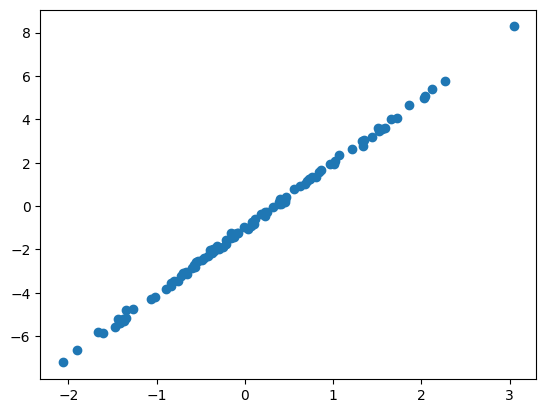

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);



In [ ]:
def model(theta, x):
  """Computes wx + b on a batch of input x."""
  w, b = theta
  return w * x + b

In [ ]:
def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2)

In [ ]:
def update(theta, x, y, lr=0.1):
  return theta - lr * jax.grad(loss_fn)(theta, x, y)

w: 3.01, b: -1.02


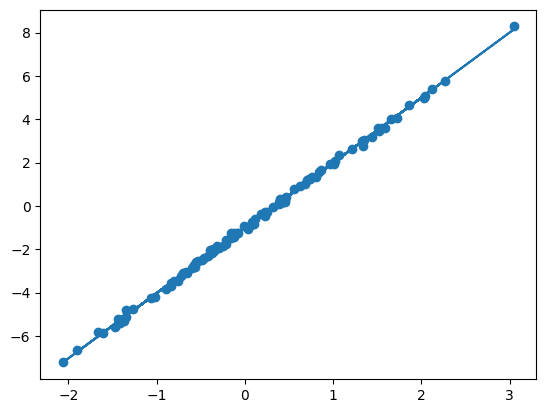

In [ ]:
theta = jnp.array([1., 1.])

for _ in range(1000):
  theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")  # 출력: w: 3.00, b: -1.00

